In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('ggplot')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
milk = pd.read_csv(r"/content/sample_data/10attributeModel_dataset.csv")


In [ ]:
print(milk.isnull().any()) #Check for null values


pH                 False
Temprature         False
Taste              False
Odor               False
Fat                False
Turbidity          False
Colour             False
lactose_content    False
protein_level      False
calcium_content    False
Grade              False
dtype: bool


<Axes: title={'center': 'Milk in Each Grade'}, xlabel='Grade'>

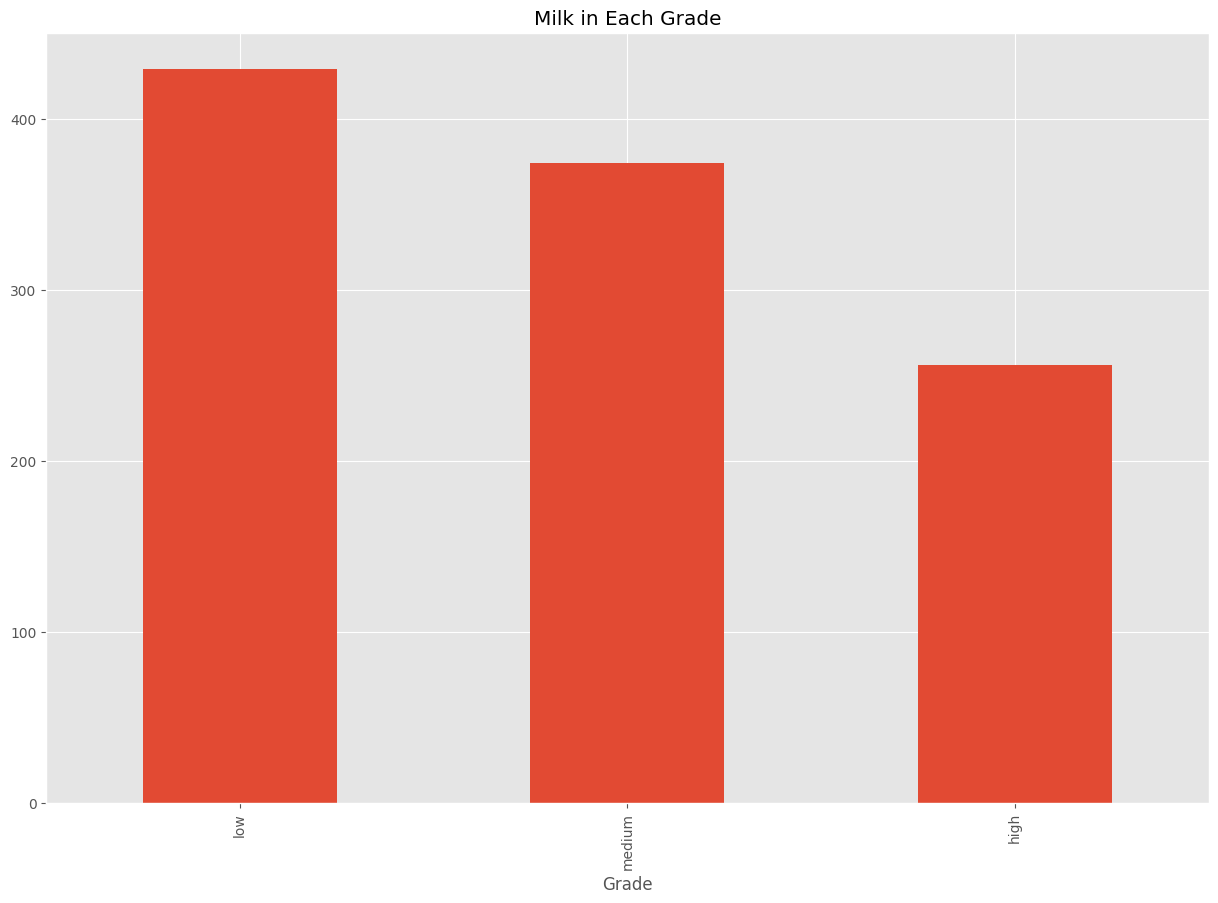

In [ ]:
milk["Grade"].value_counts().plot.bar(title = "Milk in Each Grade") #Plot the number of instances of each grade


In [ ]:
rangeValues = ["Temprature", "pH", "Colour","lactose_content","protein_level","calcium_content"] #Get the columns that are ranged values

#For each ranged value column, print the range of the column (min and max)
for column in rangeValues:
    #Print the range for these columns that have ranges
    print(column, "Range: ", milk[column].unique().min(), "-", milk[column].unique().max())

Temprature Range:  34 - 90
pH Range:  3.0 - 9.5
Colour Range:  240 - 255
lactose_content Range:  4.5 - 5.2
protein_level Range:  3.2 - 3.8
calcium_content Range:  120 - 129


In [ ]:
gradeType = ["high", "medium", "low"]  # Word names for the different grades

# Loop through each grade to get subsets and range values
for grade in gradeType:
    # Filter the dataset for the specific grade
    subset = milk.loc[milk["Grade"] == grade]

    # Print the range for each ranged value column
    for column in rangeValues:
        if column in subset.columns:  # Ensure the column exists in the dataset
            print(
                grade,
                column,
                "Range: ",
                subset[column].min(),
                "-",
                subset[column].max()
            )
        else:
            print(f"Column '{column}' not found in the dataset.")


high Temprature Range:  35 - 45
high pH Range:  6.5 - 6.8
high Colour Range:  245 - 255
high lactose_content Range:  5.0 - 5.2
high protein_level Range:  3.6 - 3.8
high calcium_content Range:  126 - 129
medium Temprature Range:  34 - 45
medium pH Range:  6.4 - 6.8
medium Colour Range:  240 - 255
medium lactose_content Range:  4.7 - 5.0
medium protein_level Range:  3.3 - 3.6
medium calcium_content Range:  122 - 125
low Temprature Range:  34 - 90
low pH Range:  3.0 - 9.5
low Colour Range:  245 - 255
low lactose_content Range:  4.5 - 4.7
low protein_level Range:  3.2 - 3.3
low calcium_content Range:  120 - 121


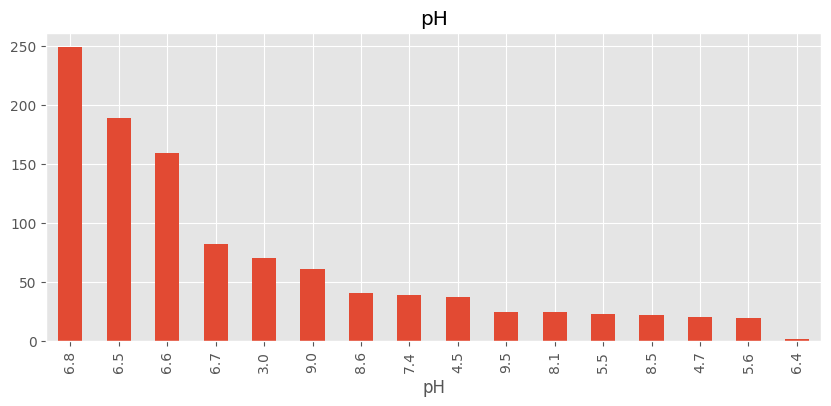

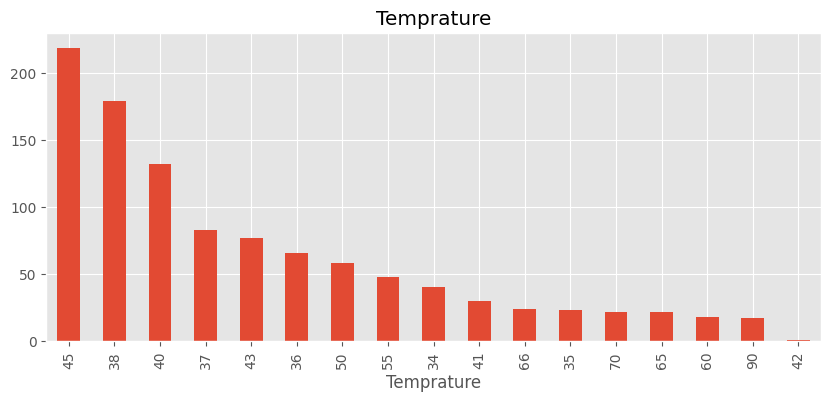

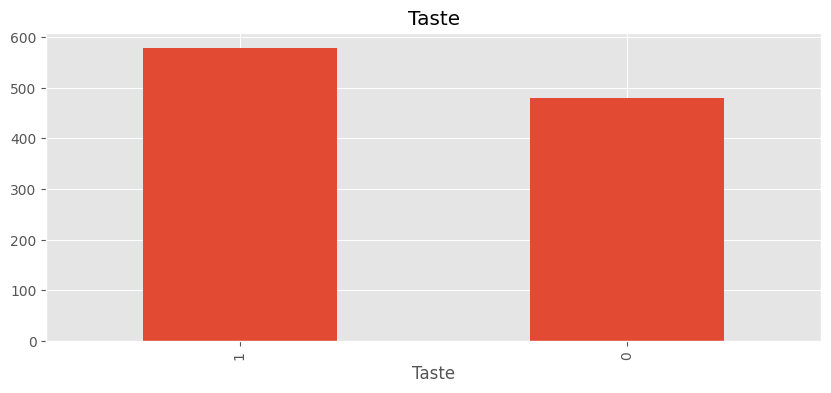

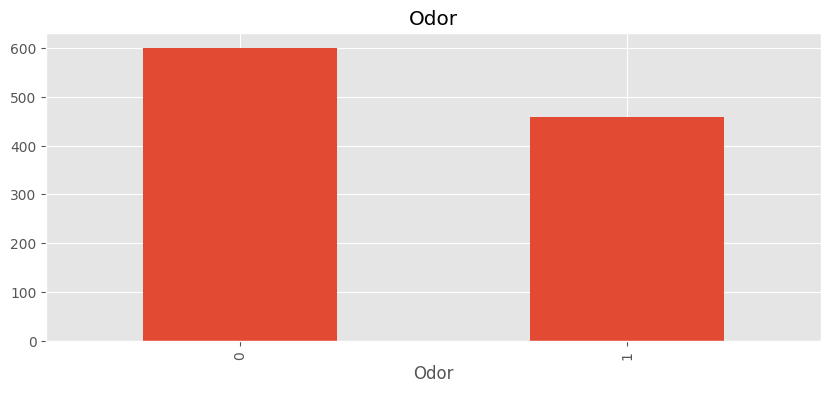

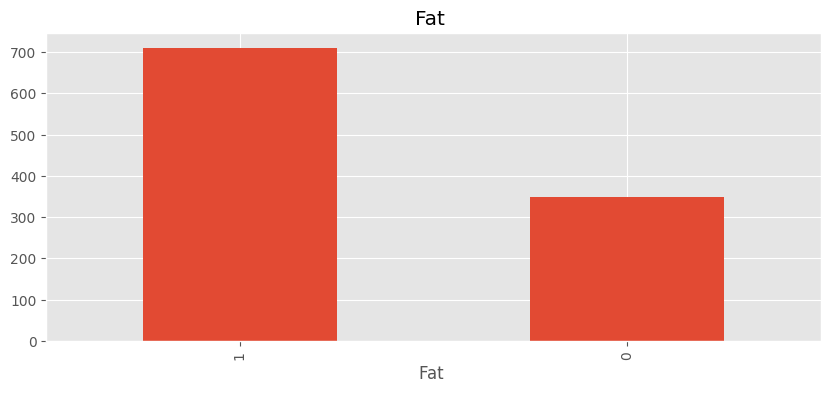

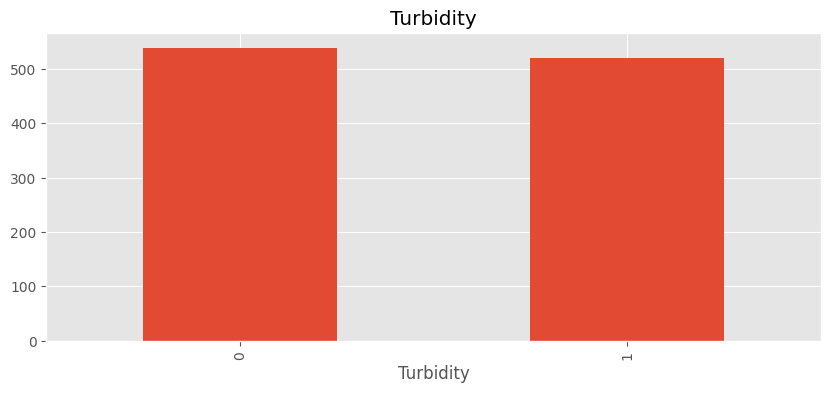

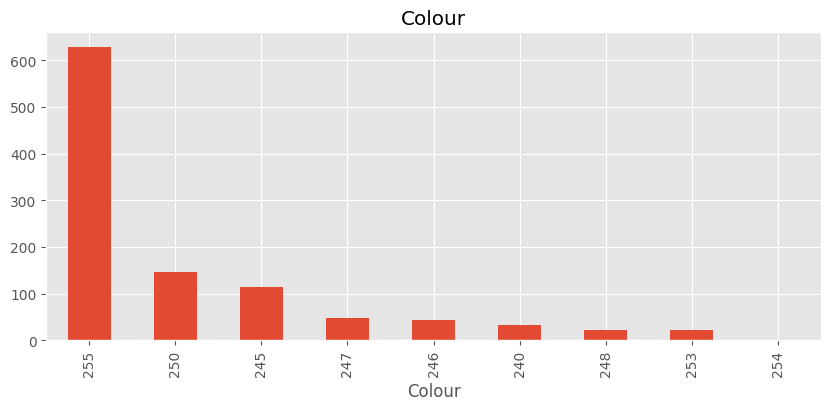

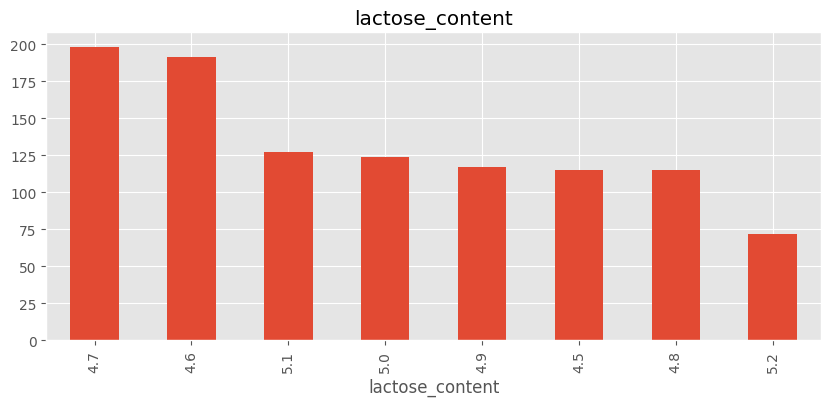

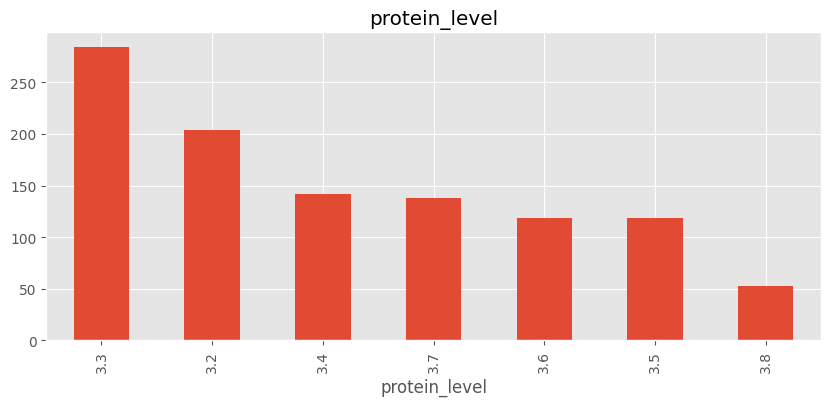

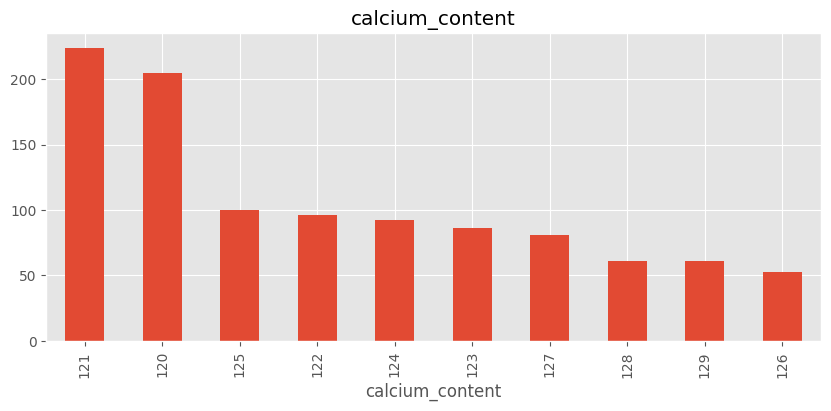

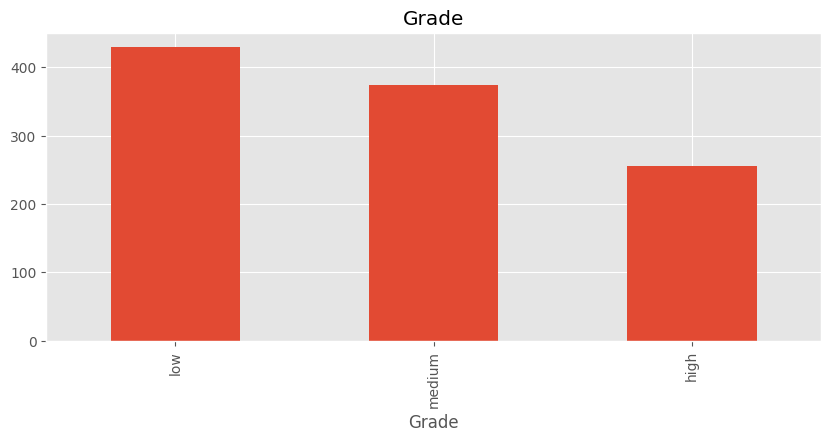

In [ ]:
plt.rcParams['figure.figsize'] = (10,4) #Update the graph sizes

#For each milk column, plot it in a bar graph
for column in milk.columns:
    plt.figure() #Get the figure so it will let me plot multiple
    milk[column].value_counts().plot.bar(title = column) #Plot the specified column

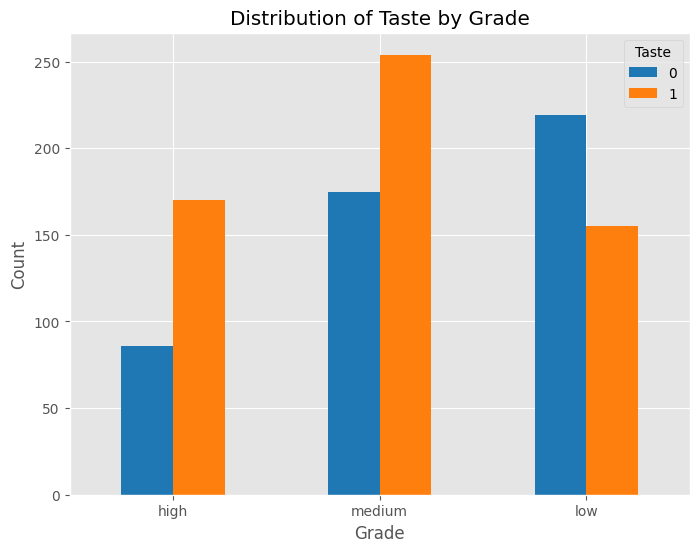

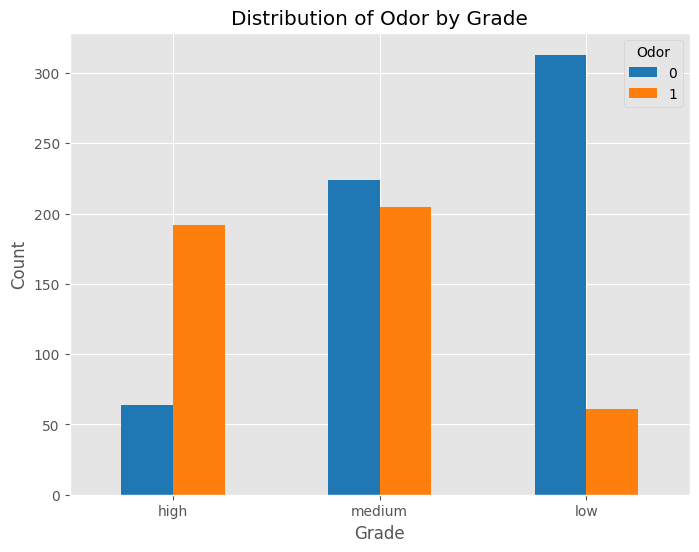

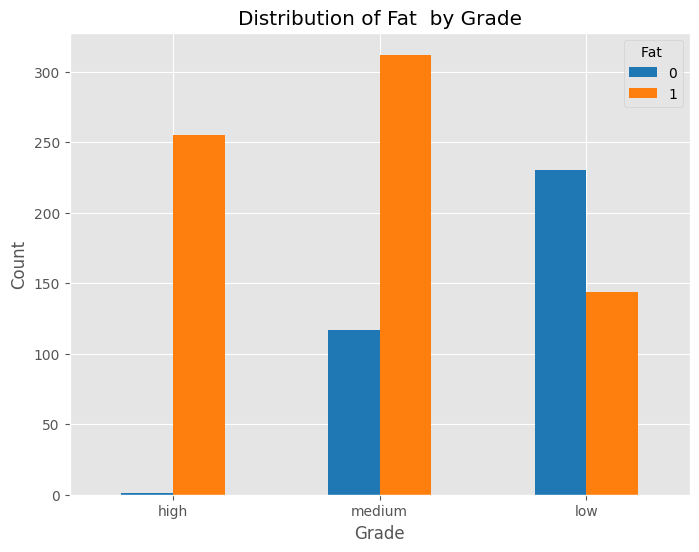

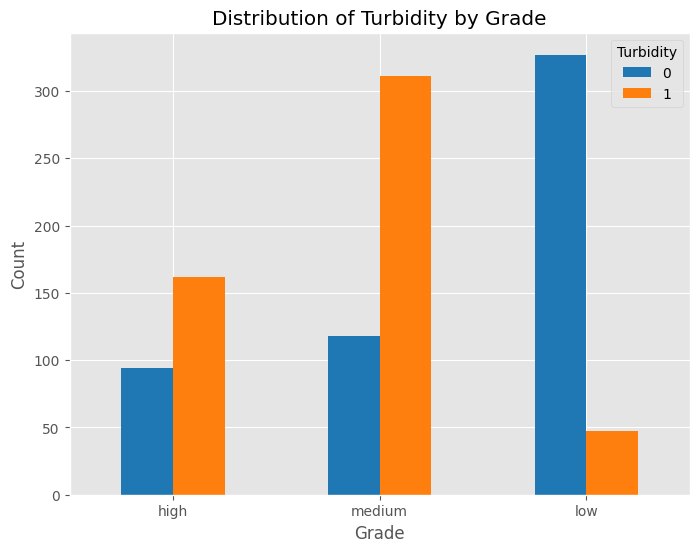

In [ ]:
import matplotlib.colors as mcolors

# List of attributes excluding the 'Grade' column
attributes = ['Taste', 'Odor', 'Fat ', 'Turbidity']

# Color palette for different bars within each grade
colors = list(mcolors.TABLEAU_COLORS.values())  # Get a list of colors from matplotlib's color options

# Function to adjust label display by comparing counts of "low" and "medium"
def get_adjusted_counts(attribute):
    # Count occurrences of each value for each grade
    grade_counts = milk.groupby(['Grade'])[attribute].value_counts().unstack().fillna(0)

    # If "medium" has higher values than "low", swap them for display
    if grade_counts.loc['medium'].sum() > grade_counts.loc['low'].sum():
        # Swap "low" and "medium" labels for visualization
        grade_counts = grade_counts.rename(index={'low': 'medium', 'medium': 'low'})
    else:
        # Use original labels
        grade_counts = grade_counts.rename(index={'low': 'medium', 'medium': 'low'})

    return grade_counts

# Loop through each attribute and create a bar chart
for attribute in attributes:
    plt.figure(figsize=(8, 6))

    # Get adjusted counts with swapped labels if needed
    grade_counts = get_adjusted_counts(attribute)

    # Generate the plot with different colors for each bar within a grade
    grade_counts.plot(kind='bar', stacked=False, ax=plt.gca(), color=colors[:len(grade_counts.columns)])

    # Set plot title and labels
    plt.title(f'Distribution of {attribute} by Grade')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.legend(title=attribute)
    plt.xticks(rotation=0)
    plt.show()

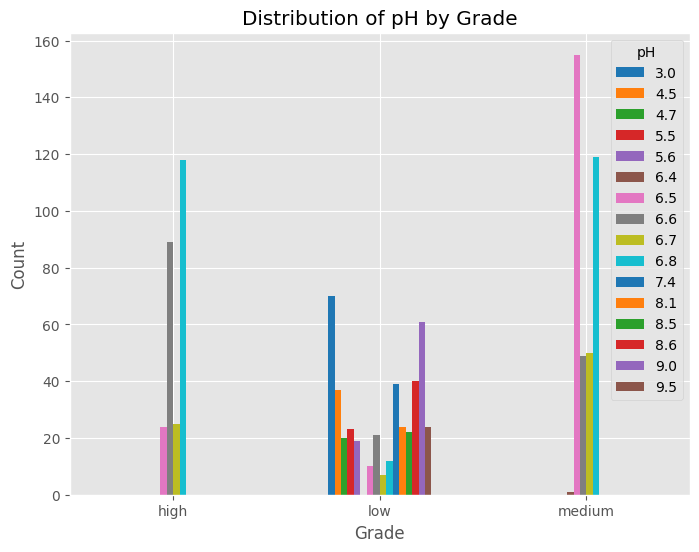

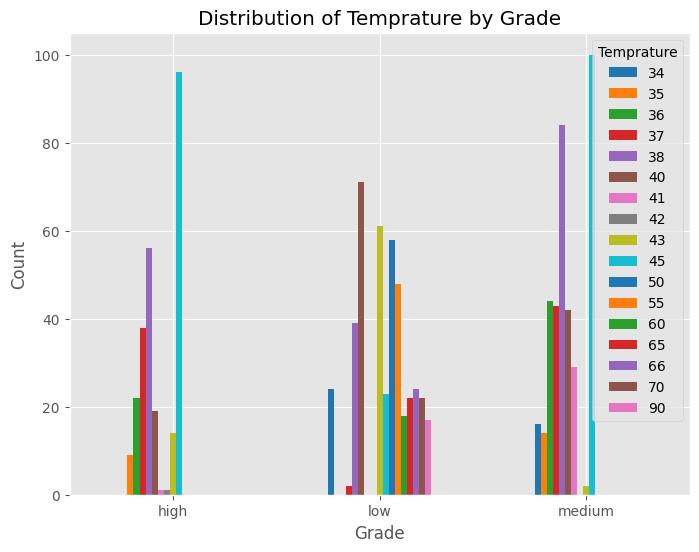

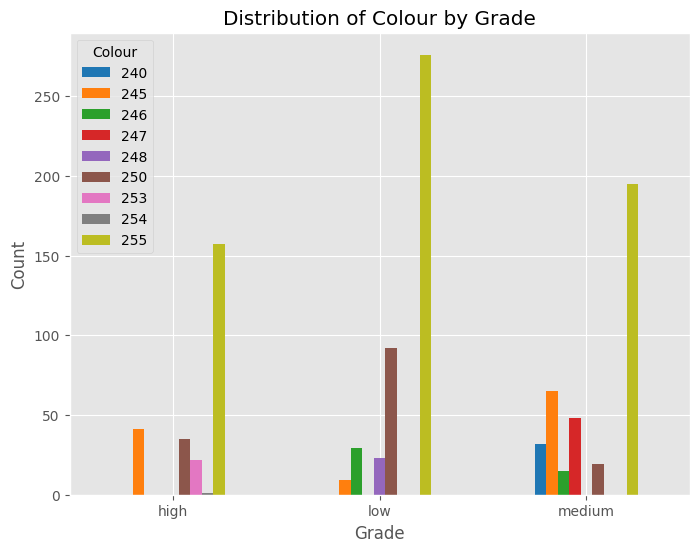

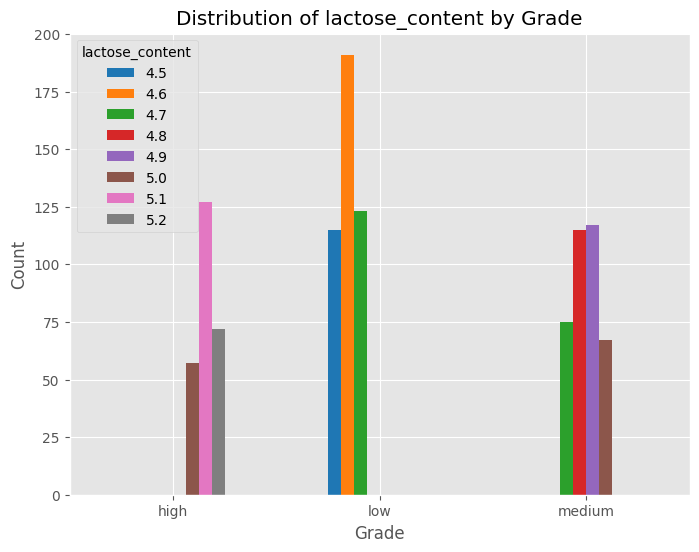

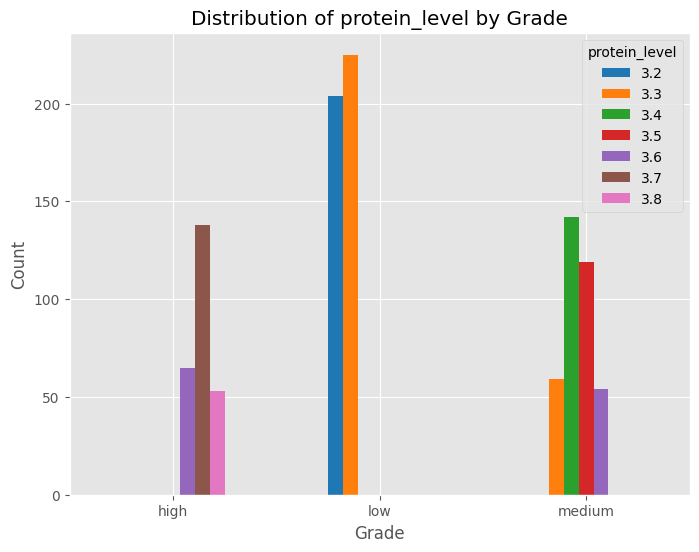

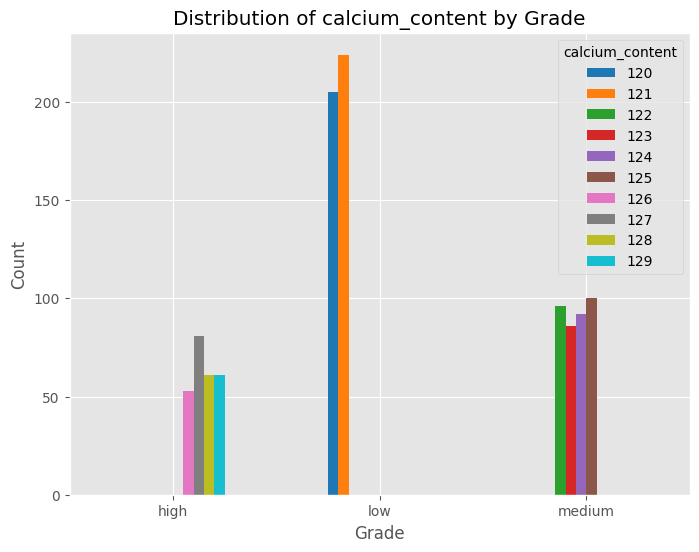

In [ ]:
# List of attributes excluding the 'Grade' column
attributes = ['pH', 'Temprature', 'Colour', 'lactose_content', 'protein_level', 'calcium_content']

# Color palette for different bars within each grade
colors = list(mcolors.TABLEAU_COLORS.values())  # Get a list of colors from matplotlib's color options

# Function to adjust label display by comparing counts of "low" and "medium"
def get_adjusted_counts(attribute):
    # Count occurrences of each value for each grade
    grade_counts = milk.groupby(['Grade'])[attribute].value_counts().unstack().fillna(0)

    # Ensure labels are displayed correctly without unintended swaps
    grade_counts = grade_counts.reindex(columns=sorted(grade_counts.columns), fill_value=0)

    return grade_counts

# Loop through each attribute and create a bar chart
for attribute in attributes:
    plt.figure(figsize=(8, 6))

    # Get adjusted counts for proper label alignment
    grade_counts = get_adjusted_counts(attribute)

    # Generate the plot with different colors for each bar within a grade
    grade_counts.plot(kind='bar', stacked=False, ax=plt.gca(), color=colors[:len(grade_counts.columns)])

    # Set plot title and labels
    plt.title(f'Distribution of {attribute} by Grade')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.legend(title=attribute)
    plt.xticks(rotation=0)
    plt.show()


In [ ]:
# Function to classify milk grades
def classifyMilk(milk, labels):
    # Encode the grades as one-hot vectors
    grade = pd.get_dummies(milk["Grade"])  # Convert Grade to dummy variables

    # Drop the target column (Grade) from features
    characteristics = milk.drop(columns=["Grade"])  # Adjusted to reflect the dataset setup

    # Split the dataset into training and testing sets
    charaTrain, charaTest, gradeTrain, gradeTest = train_test_split(
        characteristics, grade, test_size=0.2, random_state=42
    )

    # Create and train the Random Forest model
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(charaTrain, gradeTrain)

    # Make predictions on the test and training sets
    predict_test = forest.predict(charaTest)
    predict_train = forest.predict(charaTrain)

    # Calculate accuracy for training and test sets
    train_accuracy = accuracy_score(gradeTrain, predict_train)
    test_accuracy = accuracy_score(gradeTest, predict_test)

    # Convert predictions and ground truth to numeric values for RMSE calculation
    gradeTest_numeric = gradeTest.to_numpy(dtype=float)  # Convert to numeric NumPy array
    predict_numeric = np.array(predict_test, dtype=float)  # Ensure predictions are numeric

    # Print accuracies
    print("Training Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)

    # Print Root Mean Square Error
    print("Root Mean Square Error: ", np.sqrt(mean_squared_error(gradeTest_numeric, predict_numeric)))

    # Print classification report
    print("Classification Report:\n", classification_report(gradeTest, predict_test, target_names=labels))

    # Print the most important characteristics
    getChara(characteristics, forest)
    return forest

# Function to display feature importance
def getChara(characteristics, model):
    # Extract feature importance from the trained model
    feature_importance = model.feature_importances_

    # Create a DataFrame to map features with their importance values
    importance_df = pd.DataFrame({
        'Feature': characteristics.columns,
        'Importance': feature_importance
    })

    # Sort the features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Print the most important features
    print("According to the Random Forest, the most important factors for milk grade are:")
    print(importance_df)

# Main driver code
if __name__ == "__main__":

    # Rename to Grade for consistency with the code
    milk.rename(columns={"Grade": "Grade"}, inplace=True)

    grade_labels = ["low", "medium", "high"]  # Define grade labels
    model = classifyMilk(milk, grade_labels)  # Classify milk grades


Training Accuracy:  1.0
Test Accuracy:  1.0
Root Mean Square Error:  0.0
Classification Report:
               precision    recall  f1-score   support

         low       1.00      1.00      1.00        48
      medium       1.00      1.00      1.00        78
        high       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212
 samples avg       1.00      1.00      1.00       212

According to the Random Forest, the most important factors for milk grade are:
           Feature  Importance
9  calcium_content    0.463688
7  lactose_content    0.192726
8    protein_level    0.189834
0               pH    0.056717
1       Temprature    0.029471
4             Fat     0.022975
5        Turbidity    0.022649
3             Odor    0.016011
6           Colour    0.004545
2            Taste    0.001384


In [ ]:
grades = ["high", "medium"] #Get the grades for this classification
milkLite = milk.loc[milk["Grade"] != "low"] #Get all milks that are not bad

classifyMilk(milkLite, grades) #Classify every milk but bad

Training Accuracy:  1.0
Test Accuracy:  1.0
Root Mean Square Error:  0.0
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00        49
      medium       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126
 samples avg       1.00      1.00      1.00       126

According to the Random Forest, the most important factors for milk grade are:
           Feature  Importance
9  calcium_content    0.489855
7  lactose_content    0.204461
8    protein_level    0.140247
4             Fat     0.096033
3             Odor    0.041952
5        Turbidity    0.018658
6           Colour    0.002979
0               pH    0.002901
2            Taste    0.001702
1       Temprature    0.001212


RandomForestClassifier(random_state=42)

In [ ]:
pH = float(input("Enter the Ph value (3.0 to 9.5) = "))
Temprature = float(input("Enter the Temperature (34 to 90) = "))
Taste = float(input("Enter the Taste = "))
Odor = float(input("Enter the Odor = "))
Fat = float(input("Enter the Fat = "))
Turbidity = float(input("Enter the Turbidity = "))
Colour = float(input("Enter the color (240 to 255) = "))
lactose_content = float(input("Enter the Lactose Content (4.5 to 5.2)= "))
protein_level = float(input("Enter the Protein Level (3.2 to 3.8) = "))
calcium_content = float(input("Enter the Calcium Content (120 to 129) = "))

Enter the Ph value (3.0 to 9.5) = 4
Enter the Temperature (34 to 90) = 44
Enter the Taste = 1
Enter the Odor = 1
Enter the Fat = 1
Enter the Turbidity = 1
Enter the color (240 to 255) = 244
Enter the Lactose Content (4.5 to 5.2)= 5
Enter the Protein Level (3.2 to 3.8) = 4
Enter the Calcium Content (120 to 129) = 124


In [ ]:
input_data = [[pH, Temprature, Taste, Odor, Fat, Turbidity, Colour, lactose_content, protein_level, calcium_content]]
prediction = model.predict(input_data)
if prediction[0][0]:
    print("Milk is of HIGH GRADE")
elif prediction[0][1]:
    print("Milk is of AVERAGE GRADE")
else:
    print("Milk is of LOW GRADE")

Milk is of LOW GRADE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset (update the file path as needed)
df = pd.read_csv('/content/sample_data/10attributeModel_dataset.csv')

# Assuming 'Grade' is the target column and the rest are features
X = df.drop(columns=['Grade'])
y = df['Grade']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get the first tree in the Random Forest
first_tree = rf_model.estimators_[0]

# Function to convert the class labels to the new mapping
def convert_class_labels(class_label):
    if class_label == 1.0:
        return 1  # Low -> Class 1
    elif class_label == 2.0:
        return 2  # Medium -> Class 2
    elif class_label == 0.0:
        return 3  # High -> Class 3
    else:
        return class_label  # In case of any unexpected label

# Visualizing the first tree structure (You can adjust this as needed)
from sklearn.tree import export_text

# Get the text representation of the decision tree
tree_rules = export_text(first_tree, feature_names=list(X.columns))
print(tree_rules)

# If you want to convert class labels in the dataset
y_train = y_train.apply(convert_class_labels)
y_test = y_test.apply(convert_class_labels)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Now when you print or visualize the results, the class labels will be 1, 2, and 3


|--- lactose_content <= 4.75
|   |--- protein_level <= 3.35
|   |   |--- Temprature <= 37.00
|   |   |   |--- calcium_content <= 122.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- calcium_content >  122.50
|   |   |   |   |--- class: 2.0
|   |   |--- Temprature >  37.00
|   |   |   |--- calcium_content <= 121.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- calcium_content >  121.50
|   |   |   |   |--- class: 2.0
|   |--- protein_level >  3.35
|   |   |--- class: 2.0
|--- lactose_content >  4.75
|   |--- lactose_content <= 5.05
|   |   |--- Temprature <= 42.00
|   |   |   |--- protein_level <= 3.65
|   |   |   |   |--- Fat  <= 0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Fat  >  0.50
|   |   |   |   |   |--- Temprature <= 39.00
|   |   |   |   |   |   |--- Odor <= 0.50
|   |   |   |   |   |   |   |--- protein_level <= 3.55
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- protein_level >  3.55
|   |   |   |   |   |   |   |   |---

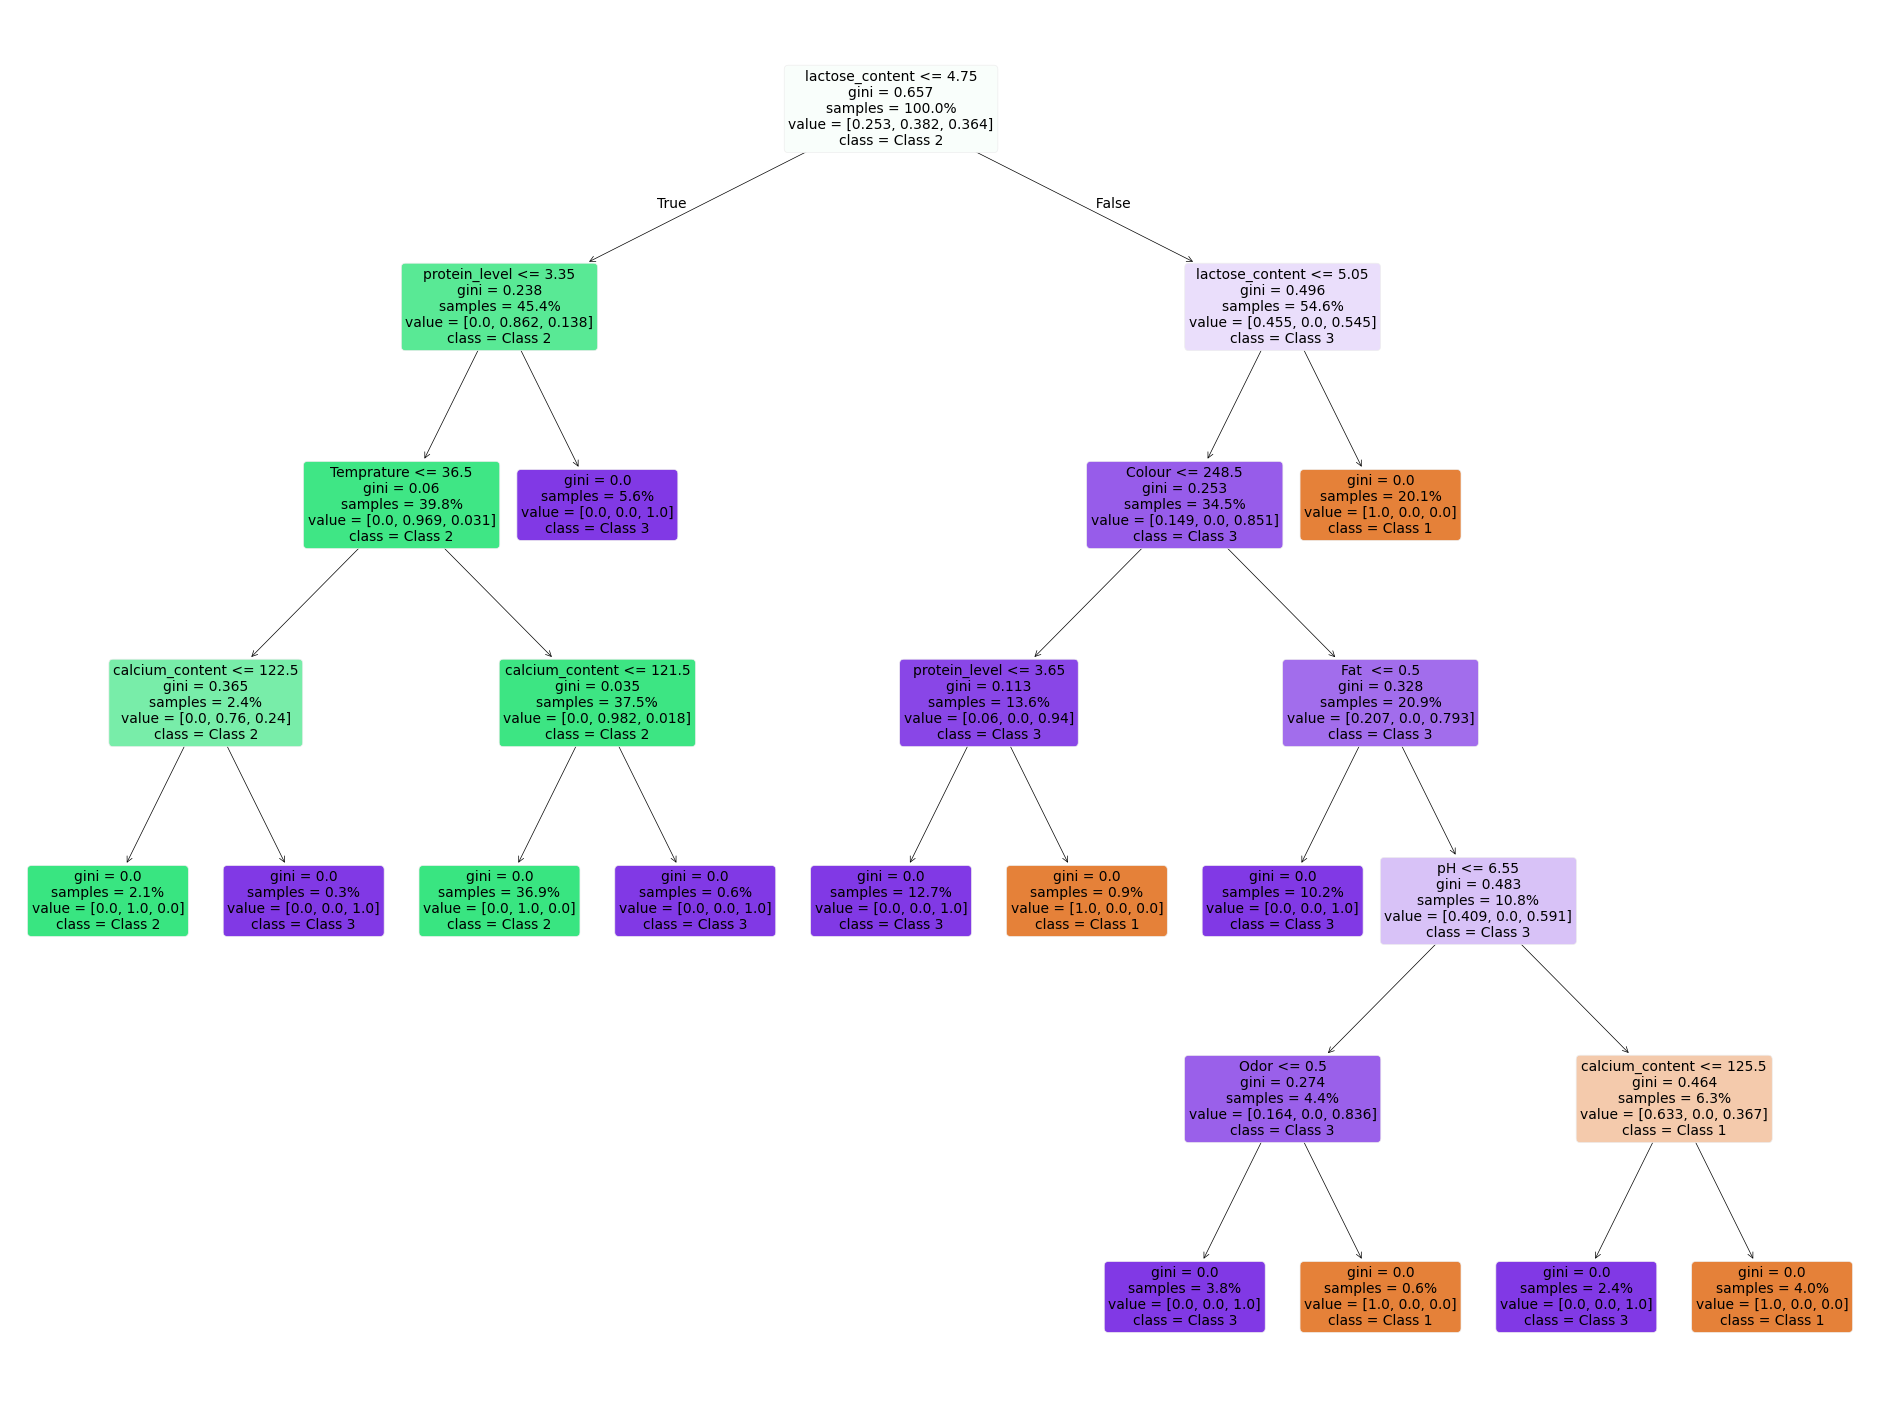

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the first tree in the Random Forest
first_tree = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(24, 18))  # Increase figure size
plot_tree(first_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Class 1', 'Class 2', 'Class 3'],  # Use the correct class names
          fontsize=10,  # Increase font size for readability
          rounded=True,
          proportion=True,
          )  # Limit the depth for better clarity
plt.show()
